<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_02/class_002_image_processing_smart_trash_bin_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage

In [ ]:
!gdown 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 240MB/s]


In [ ]:
FILE='trash_nov_22_2018.zip'

In [ ]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
Img_Size = 40
ref = 'jpg'
notref = 'met'

In [ ]:
X= []  
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    X.append(cv2.imread(name,0))
m = len(Y)
print(n,m)

2527 2527


In [ ]:
g = skimage.feature.greycomatrix(X[0], [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[]
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[76.67184943553663, 3.8348893570026195, 0.48371336250089464, 0.041509031676850994, 0.9899797711903227, 0.0017229997107498193]


In [ ]:
m = skimage.exposure.rescale_intensity(X[1000], in_range='image', out_range='dtype')
g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256,normed=True, symmetric=True)
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[]
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[370.0416240592274, 7.213214869281038, 0.5907514116474932, 0.07141249134554789, 0.982188674848156, 0.005099743920177952]


In [ ]:
np.max(X[3])

255

In [ ]:

glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb
features =[]
for i in range(len(img_name)):
  glcm =[]
  m = skimage.exposure.rescale_intensity(X[i], in_range='image', out_range='dtype')
  g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256,normed=True, symmetric=True)
  for x in glcm_names:
    prop = skimage.feature.greycoprops(g, x)
    glcm.append(np.max(prop))
  features.append(glcm)

df = pd.DataFrame(features,columns=glcm_names)

In [ ]:
df.head()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,100.285841,4.381309,0.461713,0.041509,0.989934,0.001723
1,100.720787,6.039139,0.356470,0.035720,0.997310,0.001276
2,341.852161,6.814918,0.487461,0.040566,0.980984,0.001646
3,374.947181,6.263133,0.644212,0.067136,0.977153,0.004507
4,47.916999,4.853743,0.351147,0.032939,0.996115,0.001085


In [ ]:
df.shape

(2527, 6)

In [ ]:
n =len(img_name)
tipos = []
selected = 'find'
for x in img_name:
  result =''.join([i for i in x[:-4] if not i.isdigit()])
  if(result != selected):
    selected = result
    tipos.append(selected)


In [ ]:
tipos

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
label =[]
for name in img_name:
  for idx, x in enumerate(tipos):
    if(x in name):
      label.append(idx)

In [ ]:
len(label),len(img_name)

(2527, 2527)

In [ ]:
df['target']=label

In [ ]:
df.head()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,target
0,100.285841,4.381309,0.461713,0.041509,0.989934,0.001723,0
1,100.720787,6.039139,0.356470,0.035720,0.997310,0.001276,0
2,341.852161,6.814918,0.487461,0.040566,0.980984,0.001646,0
3,374.947181,6.263133,0.644212,0.067136,0.977153,0.004507,0
4,47.916999,4.853743,0.351147,0.032939,0.996115,0.001085,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


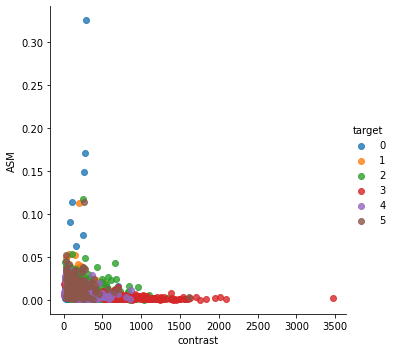

In [ ]:
sns.lmplot('contrast', 'ASM', data=df, hue='target',fit_reg=False) 
plt.show()

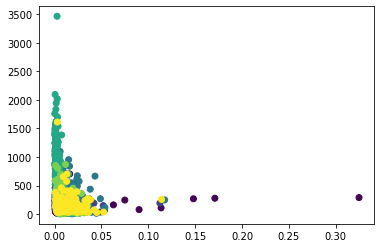

In [ ]:
plt.scatter(df['ASM'],df['contrast'],c=df['target'])